In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('dark')

Sources for the examples: 
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://sklearn.org/modules/decomposition.html#pca-using-randomized-svd

# PCA

Principal component analysis (PCA) is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.

## PCA and variance explained

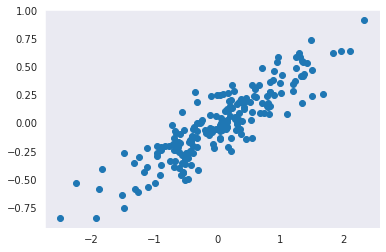

In [33]:
# original two dimensional data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1]);

In [43]:
# pca with 2 dimensions (original number of dimensions)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(X)

In [55]:
# principal component vectors
print('principal component vectors')
print(pca.components_)

principal component vectors
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [56]:
# variance explained by each principal component vector
print('vairance explained by each principal component vector')
print(pca.explained_variance_)

vairance explained by each principal component vector
[0.7625315 0.0184779]


In [57]:
# mean of the principal components
# corresponds to origin of the transformed coordinate
print('origin of pca coordinate')
print(pca.mean_)

origin of pca coordinate
[ 0.03351168 -0.00408072]


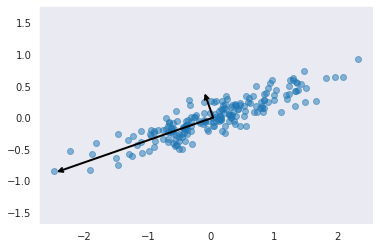

In [63]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                    color = 'black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.title('')

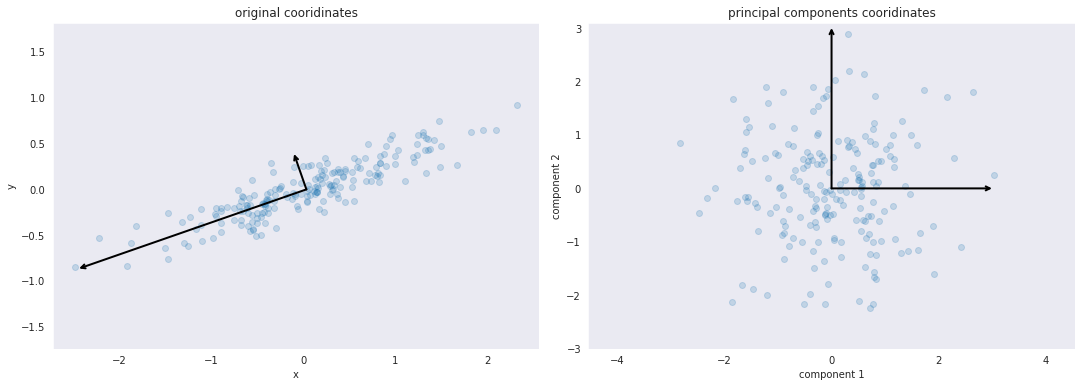

In [67]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# original data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='original cooridinates')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components cooridinates',
          xlim=(-5, 5), ylim=(-3, 3.1));

In [72]:
# dimensionality reduction to 1
pca = PCA(n_components=1)
pca = pca.fit(X)
X_pca = pca.transform(X)

print(X.shape)
print(X_pca.shape)

(200, 2)
(200, 1)


In [74]:
# inverse transform to understand the dimensionality reduction
X_inv = pca.inverse_transform(X_pca)

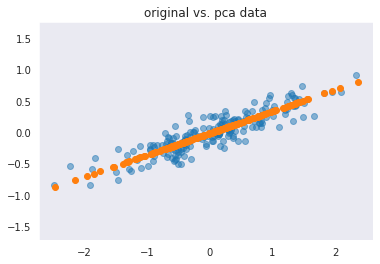

In [79]:
# plot
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label = 'original data')
plt.scatter(X_inv[:, 0], X_inv[:, 1], label = 'lower dimensional data')
plt.axis('equal')
plt.title('original vs. pca data');

While the size of the data is reduced by half, the data still explains about 76% of the original variance.

# Mnist PCA

In [99]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
target = digits.target
print(data.shape)
print(target.shape)

(1797, 64)
(1797,)


In [97]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

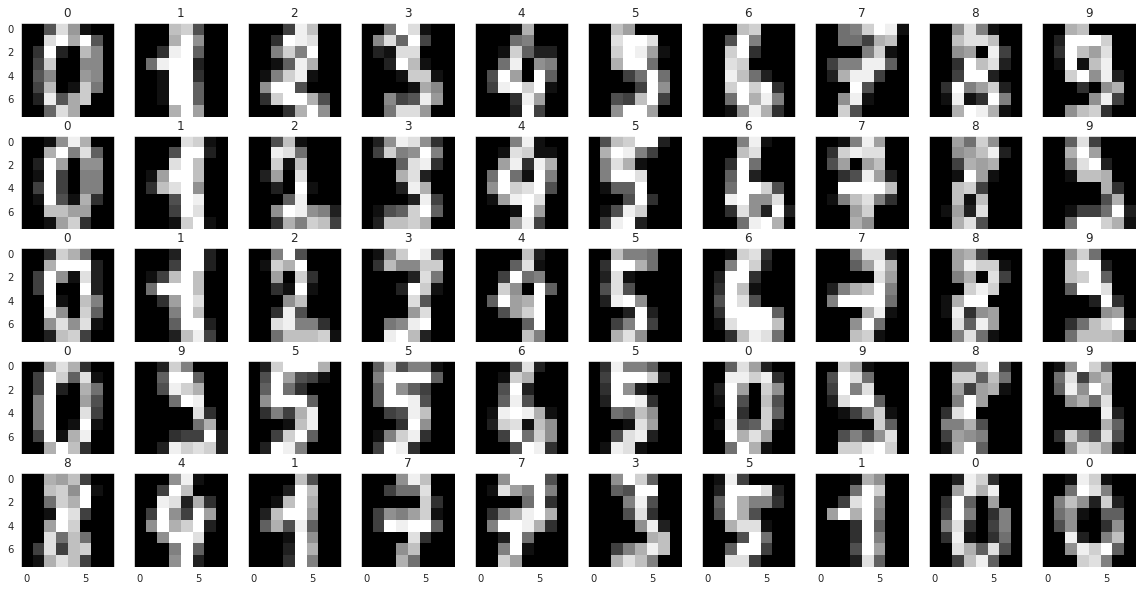

In [103]:
fig, axs = plt.subplots(5, 10, figsize = (20, 10), sharex=True, sharey=True)
axs = axs.flatten()
for idx, digit in enumerate(data[:50]):
    axs[idx].imshow(digit.reshape(8, 8), cmap = 'gray')
    axs[idx].set_title(target[idx]);

Currently, each image is represented by 64 dimensional array.

In [125]:
pca = PCA(n_components=2)
pca = pca.fit(data)
data_pca = pca.transform(data)
print(data.shape)
print(data_pca.shape)

(1797, 64)
(1797, 2)


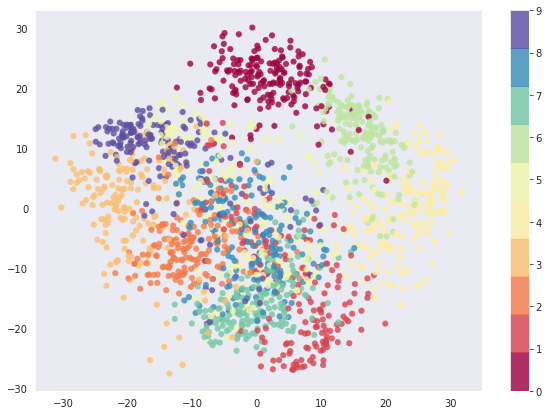

In [130]:
plt.figure(figsize = (10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = target, cmap=plt.cm.get_cmap('Spectral', 10), alpha = 0.8, linewidths=0.1)
plt.colorbar();

# Choosing number of components: Elbow plot

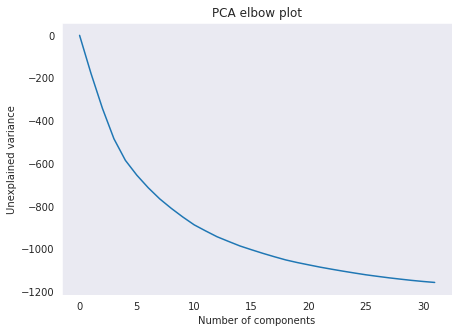

In [152]:
unexplained_vars = []
for n_comp in range(32):
    pca = PCA(n_components=n_comp)
    pca.fit(data)
    unexplained_var = 1 - sum(pca.explained_variance_)
    unexplained_vars.append(unexplained_var)

fig, ax = plt.subplots(1,1, figsize = (7, 5))
ax.plot(range(32), unexplained_vars)
ax.set_xlabel('Number of components')
ax.set_ylabel('Unexplained variance')
ax.set_title('PCA elbow plot');

For more involved decision of number of components, refer to 
https://ieeexplore.ieee.org/document/6846297

# Image filtering with PCA

Principal components are relatively unaffected by random noise. As random noise is iid over each pixel, they are not picked up by principal components.

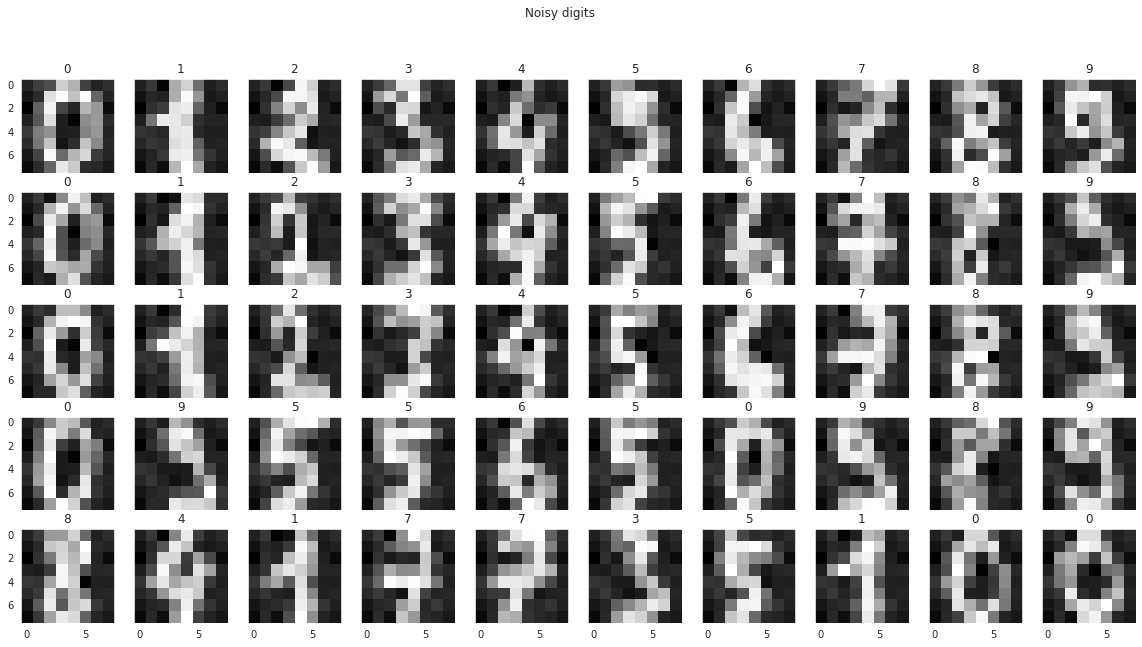

In [197]:
data_noise = data + (np.random.randn(64))

fig, axs = plt.subplots(5, 10, figsize = (20, 10), sharex=True, sharey=True)
fig.suptitle('Noisy digits')
axs = axs.flatten()
for idx, digit in enumerate(data_noise[:50]):
    axs[idx].imshow(digit.reshape(8, 8), cmap = 'gray')
    axs[idx].set_title(target[idx]);

In [200]:
# assigining fractional n_component, we can assign how much variance you'd like to explain with the model
pca = PCA(0.5)
pca = pca.fit(data_noise)
transformed = pca.transform(data_noise)
filtered = pca.inverse_transform(transformed)

In [201]:
# it turns out 9 components are needed to explain 70% of variance
print(pca.n_components_)
print(sum(pca.explained_variance_ratio_))

5
0.5449635267268979


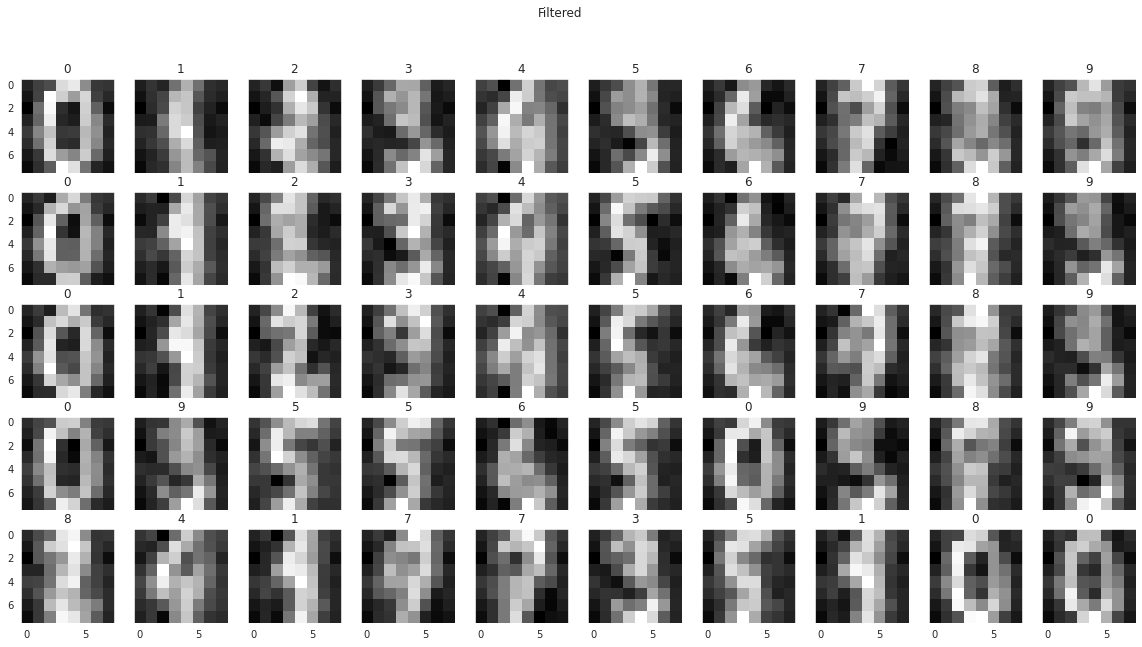

In [202]:
fig, axs = plt.subplots(5, 10, figsize = (20, 10), sharex=True, sharey=True)
fig.suptitle('Filtered')
axs = axs.flatten()
for idx, digit in enumerate(filtered[:50]):
    axs[idx].imshow(digit.reshape(8, 8), cmap = 'gray')
    axs[idx].set_title(target[idx]);

# Eigenfaces

In [205]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


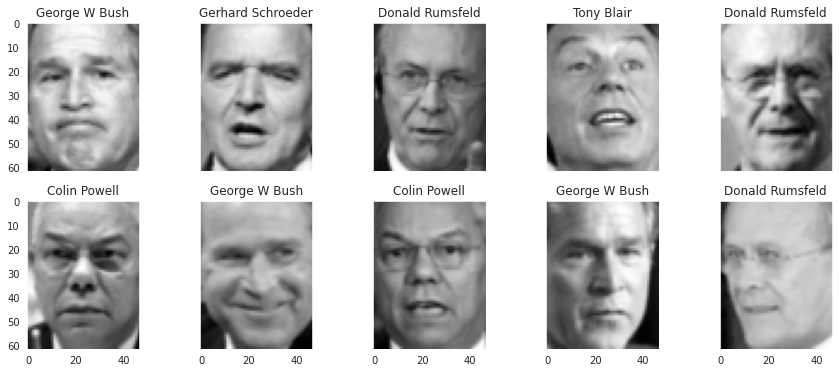

In [216]:
fig, axs = plt.subplots(2, 5, figsize = (15, 6), sharex=True, sharey=True)
axs = axs.flatten()
for idx, face in enumerate(faces.images[:10]):
    axs[idx].imshow(face, cmap = 'gray')
    axs[idx].set_title(faces.target_names[faces.target[idx]]);

In [232]:
# randomised PCA allows much more quick computation by dropping lower
pca = PCA(n_components=50, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

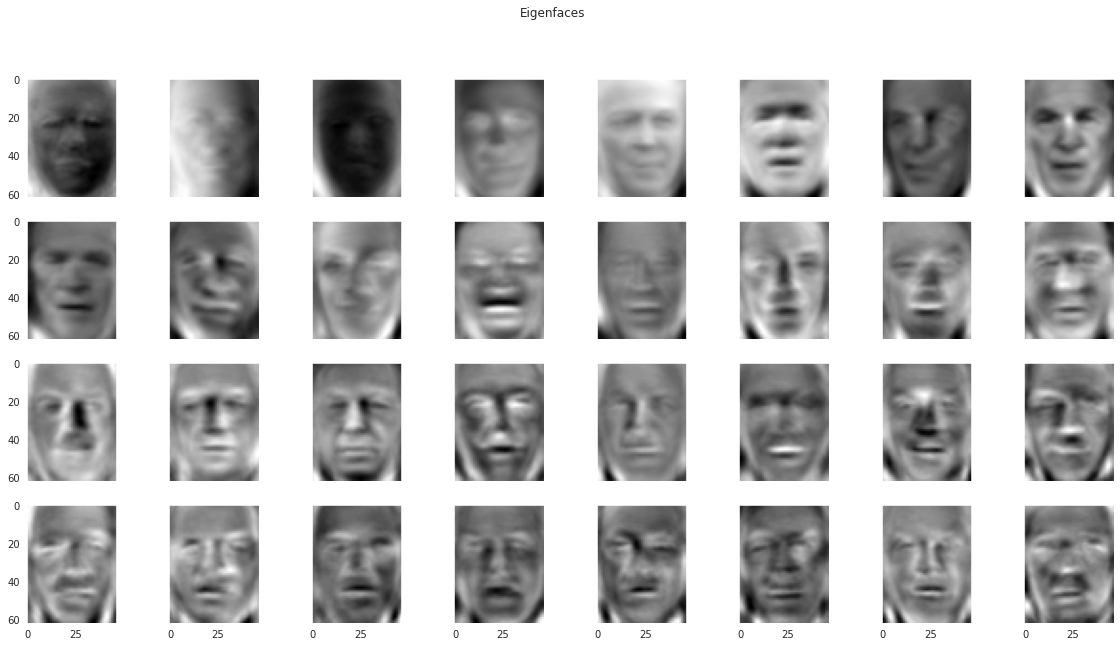

In [236]:
fig, axs = plt.subplots(4, 8, figsize = (20, 10), sharex=True, sharey=True)
fig.suptitle('Eigenfaces')
axs = axs.flatten()
for idx, face in enumerate(pca.components_[:32]):
    axs[idx].imshow(face.reshape(62, 47), cmap = 'gray')

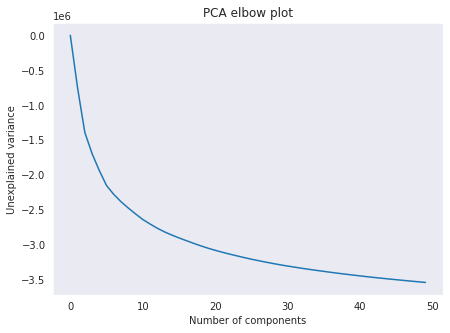

In [237]:
unexplained_vars = []
for n_comp in range(50):
    pca = PCA(n_components=n_comp)
    pca.fit(faces.data)
    unexplained_var = 1 - sum(pca.explained_variance_)
    unexplained_vars.append(unexplained_var)

fig, ax = plt.subplots(1,1, figsize = (7, 5))
ax.plot(range(50), unexplained_vars)
ax.set_xlabel('Number of components')
ax.set_ylabel('Unexplained variance')
ax.set_title('PCA elbow plot');

In [247]:
pca = PCA(n_components=120, svd_solver='randomized')
pca.fit(faces.data)
faces_pca = pca.transform(faces.data)
print(faces_pca.shape)
print(faces.data.shape)

(1140, 120)
(1140, 2914)


In [248]:
faces_inv = pca.inverse_transform(faces_pca)
print(faces_inv.shape)

(1140, 2914)


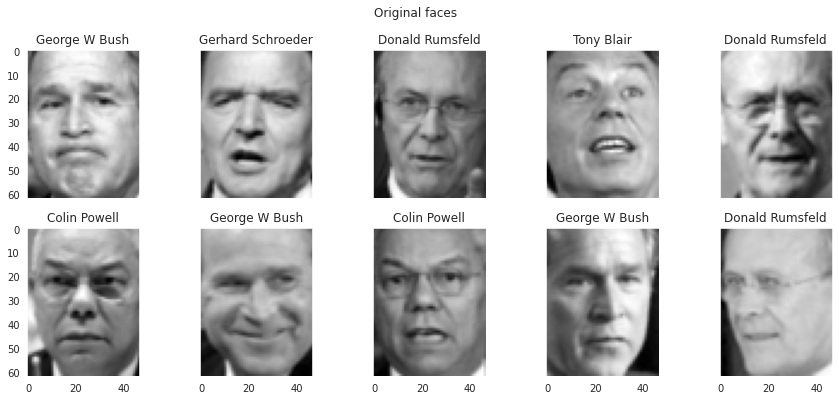

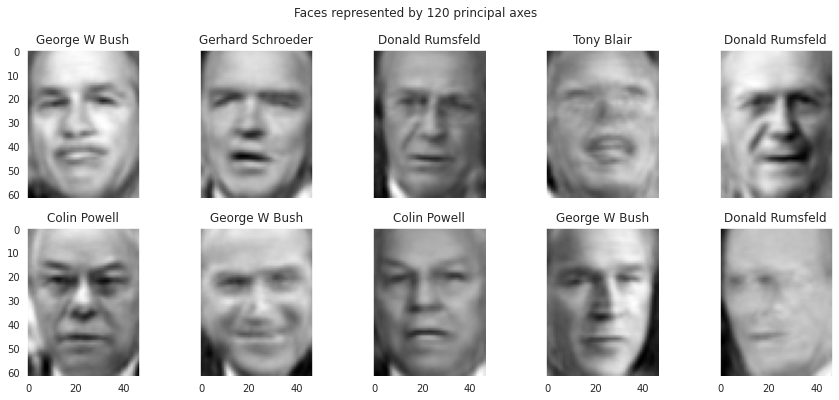

In [249]:
fig, axs = plt.subplots(2, 5, figsize = (15, 6), sharex=True, sharey=True)
axs = axs.flatten()
fig.suptitle('Original faces')
for idx, face in enumerate(faces.images[:10]):
    axs[idx].imshow(face, cmap = 'gray')
    axs[idx].set_title(faces.target_names[faces.target[idx]]);
    
fig, axs = plt.subplots(2, 5, figsize = (15, 6), sharex=True, sharey=True)
axs = axs.flatten()
fig.suptitle('Faces represented by 120 principal axes')
for idx, face in enumerate(faces_inv[:10]):
    axs[idx].imshow(face.reshape(62, 47), cmap = 'gray')
    axs[idx].set_title(faces.target_names[faces.target[idx]]);